Enter the name of the distribution (geometric, binomial, poisson, uniform): uniform
Enter the start of the range of x values (integer): 1
Enter the end of the range of x values (integer): 20
Enter the lower bound (low): 2
Enter the upper bound (high): 18


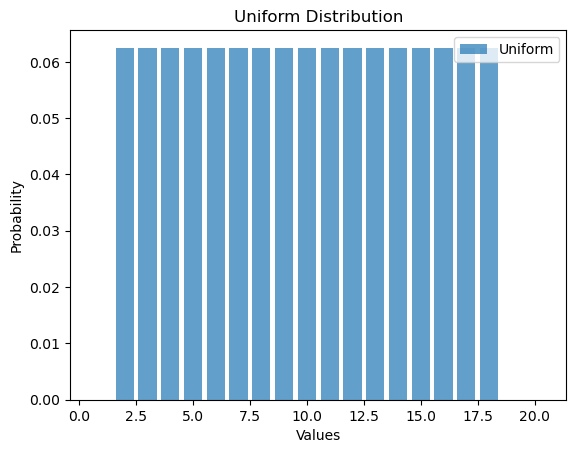

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, binom, poisson, uniform

# ------------------------------- PART 1: Distribution Functions -------------------------------

def geometric(p, vals):
    """
    Geometric Distribution
    :parameter p: Probability of success (0 < p <= 1)
    :parameter vals: List or array of integer values (x)
    :return: PMF values for the given x
    """
    if p <= 0 or p > 1:
        raise ValueError("The probability of success 'p' must be in the range (0, 1].")
    if any(v < 0 for v in vals):
        raise ValueError("All values in 'vals' must be non-negative.")
    return geom(p).pmf(vals)

def binomial(n, p, vals):
    """
    Binomial Distribution
    :parameter n: Number of trials (n >= 0)
    :parameter p: Probability of success per trial (0 <= p <= 1)
    :parameter vals: List or array of integer values (x)
    :return: PMF values for the given x
    """
    if n < 0:
        raise ValueError("The number of trials 'n' must be non-negative.")
    if p < 0 or p > 1:
        raise ValueError("The probability of success 'p' must be in the range [0, 1].")
    if any(v < 0 for v in vals):
        raise ValueError("All values in 'vals' must be non-negative.")
    return binom(n, p).pmf(vals)

def poisson_dist(mu, vals):
    """
    Poisson Distribution
    :parameter mu: Mean of the distribution (mu >= 0)
    :parameter vals: List or array of integer values (x)
    :return: PMF values for the given x
    """
    if mu < 0:
        raise ValueError("The mean 'mu' must be non-negative.")
    if any(v < 0 for v in vals):
        raise ValueError("All values in 'vals' must be non-negative.")
    return poisson(mu).pmf(vals)

def uniform_dist(low, high, vals):
    """
    Uniform Distribution
    :parameter low: Lower bound of the distribution
    :parameter high: Upper bound of the distribution (high > low)
    :parameter vals: List or array of float values (x)
    :return: PDF values for the given x
    """
    if low >= high:
        raise ValueError("The lower bound 'low' must be less than the upper bound 'high'.")
    return uniform(loc=low, scale=high-low).pdf(vals)

# ------------------------------- PART 2: Generalized Function -------------------------------

def get_probability_distribution(name, parameters, vals):
    """
    Generalized function to fetch probability values for a given distribution
    :parameter name: Name of the distribution ('geometric', 'binomial', 'poisson', 'uniform')
    :parameter parameters: Parameters specific to the chosen distribution (dict)
    :parameter vals: List or array of values (x)
    :return: Probability values
    """
    if any(v < 0 for v in vals):
        raise ValueError("All values in 'vals' must be non-negative.")
    
    name = name.lower()
    if name == 'geometric':
        return geometric(parameters['p'], vals)
    elif name == 'binomial':
        return binomial(parameters['n'], parameters['p'], vals)
    elif name == 'poisson':
        return poisson_dist(parameters['mu'], vals)
    elif name == 'uniform':
        return uniform_dist(parameters['low'], parameters['high'], vals)
    else:
        raise ValueError("Unsupported distribution name.")

# ------------------------------- PART 3: Plotting Function -------------------------------

def plot_distribution(name, parameters, vals):
    """
    Plot the distribution using matplotlib
    :parameter name: Name of the distribution ('geometric', 'binomial', 'poisson', 'uniform')
    :parameter parameters: Parameters specific to the chosen distribution (dict)
    :parameter vals: List or array of values (x)
    """
    try:
        probabilities = get_probability_distribution(name, parameters, vals)
        plt.bar(vals, probabilities, alpha=0.7, label=name.capitalize())
        plt.xlabel("Values")
        plt.ylabel("Probability")
        plt.title(f"{name.capitalize()} Distribution")
        plt.legend()
        plt.show()
    except ValueError as e:
        print(f"Error: {e}")

# ------------------------------- PART 4: Input from User -------------------------------

def get_user_input():
    """
    Get distribution name, parameters, and range of values from the user.
    """
    name = input("Enter the name of the distribution (geometric, binomial, poisson, uniform): ").strip().lower()
    
    # Get the range of x values
    start = int(input("Enter the start of the range of x values (integer): "))
    end = int(input("Enter the end of the range of x values (integer): "))
    
    if start < 0 or end < 0:
        raise ValueError("The start and end of the range of x values must be non-negative.")
    
    vals = np.arange(start, end + 1)
    
    # Get distribution-specific parameters
    parameters = {}
    if name == 'geometric':
        parameters['p'] = float(input("Enter the probability of success (p): "))
    elif name == 'binomial':
        parameters['n'] = int(input("Enter the number of trials (n): "))
        parameters['p'] = float(input("Enter the probability of success (p): "))
    elif name == 'poisson':
        parameters['mu'] = float(input("Enter the mean (mu): "))
    elif name == 'uniform':
        parameters['low'] = float(input("Enter the lower bound (low): "))
        parameters['high'] = float(input("Enter the upper bound (high): "))
    else:
        raise ValueError("Invalid distribution name.")
    
    return name, parameters, vals

# ------------------------------- PART 5: Main Execution -------------------------------

if __name__ == "__main__":
    try:
        # Get user input
        name, parameters, vals = get_user_input()
        
        # Plot the distribution
        plot_distribution(name, parameters, vals)
    except ValueError as e:
        print(f"Error: {e}")
